In [78]:
import GPy
import numpy as np
import pylab as pb
import matplotlib.pyplot as plt
from time import sleep
import pandas as pd

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.6655446957525752, right=0.6655446957525752

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



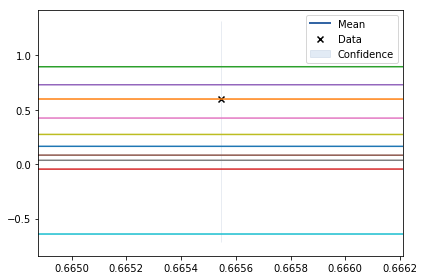

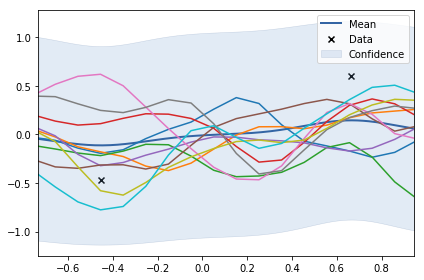

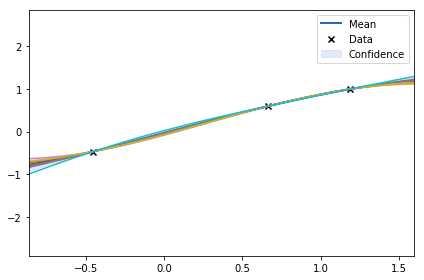

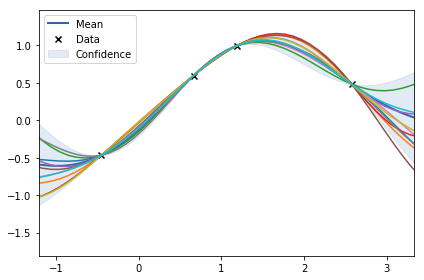

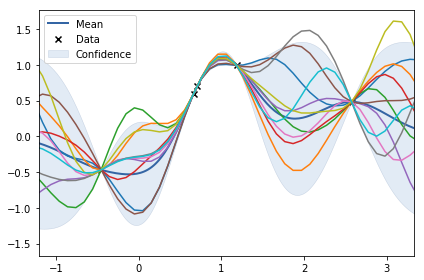

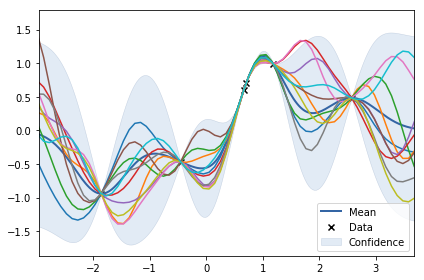

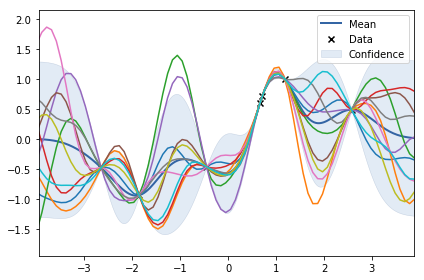

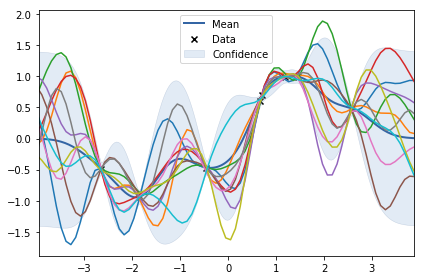

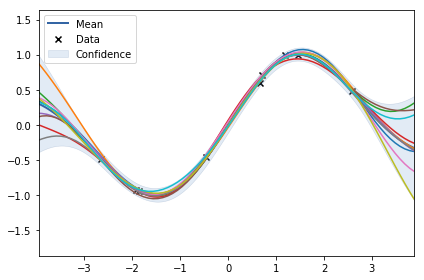

In [106]:
x_space = np.linspace(-5, 5, 100).reshape(-1, 1)

rand_x = lambda: np.random.uniform(-3.,3.,(1,1))
rand_y = lambda x: np.sin(x) + np.random.randn(1,1)*0.05

X = rand_x()
y = rand_y(X)

kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(X,y,kernel)
    
for i in range(1,10):
    m.optimize(messages=False)
    
    posteriorTestY = m.posterior_samples_f(x_space, full_cov=True, size=10)
    
    fig = m.plot()
    GPy.plotting.show(fig)
    
#     plt.scatter(X.flatten(), y.flatten())
    plt.plot(x_space, posteriorTestY)
    plt.show()
    
    new_x = rand_x()
    new_y = rand_y(new_x)
    
    X = np.vstack([X, new_x])
    y = np.vstack([y, new_y])
    
    m.set_XY(X=X, Y=y)
    
    sleep(1)
    

### CO2 data


In [67]:
co2 = pd.read_csv('data.csv', delim_whitespace=True)
co2.head()

co2 = co2[co2["mean"] != -99.99]
min(co2["mean"] )

313.2

In [68]:
co2_X = co2["dec_date"].values.reshape(-1, 1)
co2_Y = co2["mean"].values.reshape(-1, 1)

In [69]:
k1 = GPy.kern.RBF(input_dim=1, lengthscale=67.0)  # long term smooth rising trend 
k2 = GPy.kern.RBF(input_dim=1, lengthscale=90.0) \
    * GPy.kern.StdPeriodic(input_dim=1, lengthscale=1.3, period=1.0)  # seasonal component
k3 = GPy.kern.RatQuad(input_dim=1, lengthscale=1.2, power=0.78) # medium term irregularity
k4 = GPy.kern.RBF(input_dim=1, lengthscale=0.134) \
    + GPy.kern.White(input_dim=1, variance=0.19**2)  # noise terms
    
co2_kern = k1 + k2 + k3 + k4

In [108]:
m = GPy.models.GPRegression(co2_X,co2_Y,co2_kern)

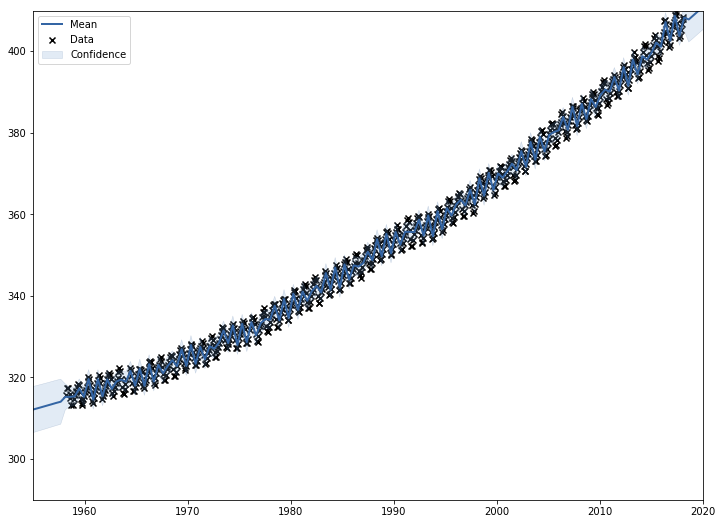

In [109]:
fig = plt.figure(figsize=(12, 9))
fig.gridspec = plt.GridSpec(1, 1)
axes = m.plot(figure=fig)
axes.set_xlim(1955, 2020)
axes.set_ylim(290, 410)
plt.show()

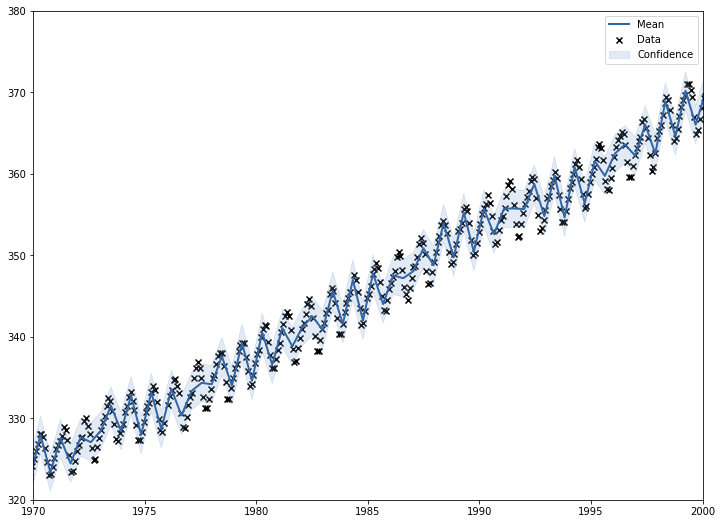

In [113]:
fig = plt.figure(figsize=(12, 9))
fig.gridspec = plt.GridSpec(1, 1)
axes = m.plot(figure=fig)
axes.set_xlim(1970, 2000)
axes.set_ylim(320, 380)
plt.show()

In [105]:
m

GP_regression.,value,constraints,priors
sum.rbf.variance,4.773607108900211e-59,+ve,
sum.rbf.lengthscale,66.43030498739836,+ve,
sum.mul.rbf.variance,627.8238861951094,+ve,
sum.mul.rbf.lengthscale,206.7829162275113,+ve,
sum.mul.std_periodic.variance,627.8238855619973,+ve,
sum.mul.std_periodic.period,182.82812405335844,+ve,
sum.mul.std_periodic.lengthscale,159.91363551335598,+ve,
sum.RatQuad.variance,258.202022741682,+ve,
sum.RatQuad.lengthscale,132.04084060624027,+ve,
sum.RatQuad.power,6.928310737549667e-20,+ve,
